In [82]:
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks"
os.chdir(ROOT)

In [83]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks'

In [84]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [85]:
def read_image(path,grayscale=True):
  img = cv2.imread(path)

  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    return img
  
  try:
    cv2.imshow("display",img)
    return img
    
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow
    cv2_imshow(img)
    return img

In [86]:
img_path = "car1.jpeg"

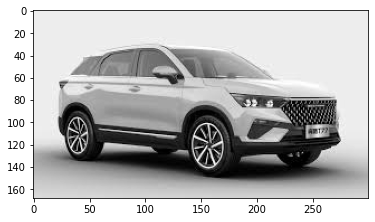

In [87]:
car = read_image(path=img_path,grayscale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



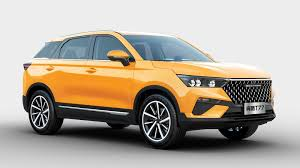

In [88]:
color_car= read_image(path=img_path,grayscale=False)

In [89]:
car.shape,color_car.shape

((168, 300), (168, 300, 3))

Apply a single conv Layer

In [90]:
row, col = car.shape
batch = 1 # single image is there
ch = 1 # grayscale
reshaped_car_img = car.reshape(batch,row,col,ch)
reshaped_car_img.shape

(1, 168, 300, 1)

In [91]:
input_shape = reshaped_car_img.shape[1:]
CONV_LAYER = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3),strides=(1,1),
                           input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [92]:
out = conv_model.predict(reshaped_car_img)

In [93]:
out.shape

(1, 166, 298, 1)

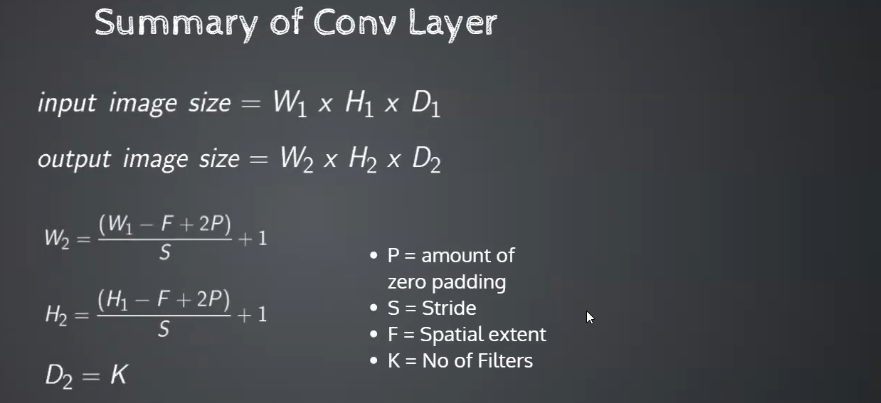

In [94]:
(168-3 +2*(0))//1 + 1

166

In [95]:
(300-3 +2*(0))//1 + 1

298

In [96]:
row, col = out.shape[1:-1]
_, row, col, _ = out.shape
row, col

(166, 298)

In [97]:
reshaped_out = out.reshape(row,col)
reshaped_out.shape

(166, 298)

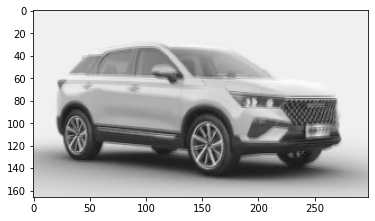

In [98]:
plt.imshow(reshaped_out,cmap="gray")

FOR COLOR IMAGE

In [99]:
# (1, r, c, ch)

In [100]:
color_car.shape

(168, 300, 3)

In [101]:
row, col, ch = color_car.shape
color_car_reshaped = color_car.reshape(1,row, col, ch)
color_car_reshaped.shape

(1, 168, 300, 3)

In [102]:
input_shape = color_car_reshaped.shape[1:]
CONV_LAYER = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3),strides=(1,1),
                           input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [103]:
3*3*3 + 1

28

In [104]:
out = conv_model.predict(color_car_reshaped)

In [105]:
out.shape

(1, 166, 298, 1)

In [106]:
row, col = out.shape[1:-1]
_, row, col, _ = out.shape
row, col

(166, 298)

In [107]:
reshaped_out = out.reshape(row,col)
reshaped_out.shape

(166, 298)

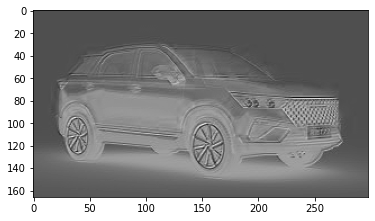

In [108]:
plt.imshow(reshaped_out,cmap="gray")

In [118]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1,row,col,1)
    return img
  else:
    row, col, ch = img.shape
    color_img = img.reshape(1,row,col,ch)
    return color_img

In [119]:
def get_conv_model(filters=1, kernel_size=(3,3),strides=(1,1),
                            input_shape=None,
                   padding = "valid"):
  input_shape = color_car_reshaped.shape[1:]
  CONV_LAYER = [
                tf.keras.layers.Conv2D(filters=filters, 
                             kernel_size=kernel_size,
                             strides=strides,
                            input_shape=input_shape)
              ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [120]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    print(img.shape)

    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshaped_out = out.reshape(row,col,channels)
    for channel in range(channels):
      plt.imshow(reshaped_out[:,:,channel],cmap="gray")
      plt.show()
  except Exception as e:
    raise e 

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



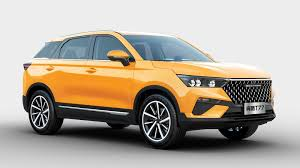

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 168, 300, 3)
(1, 166, 298, 1)


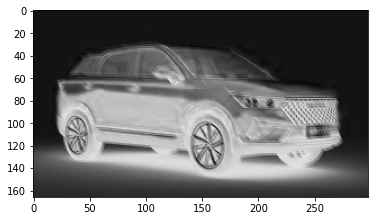

In [121]:
img = read_image(img_path,grayscale=False)
input_img = reshaping_in(img,grayscale=False)
model = get_conv_model(filters=1, 
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



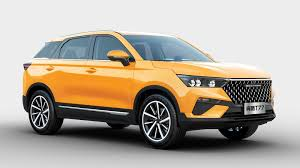

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
(1, 168, 300, 3)
(1, 166, 298, 5)


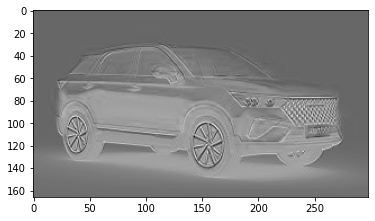

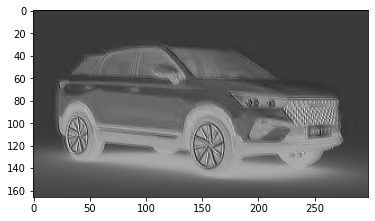

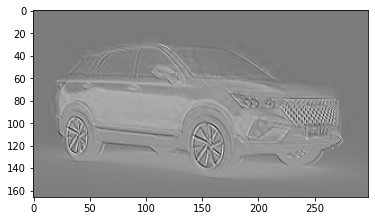

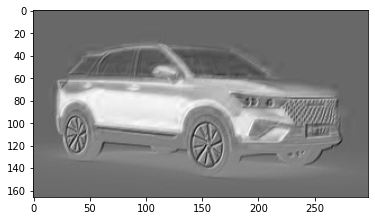

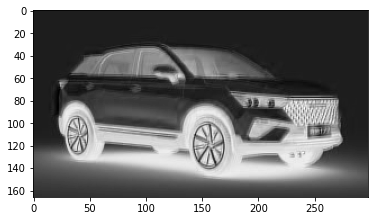

In [122]:
img = read_image(img_path,grayscale=False)
input_img = reshaping_in(img,grayscale=False)
model = get_conv_model(filters=5, 
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

In [123]:
28*5

140

(1, 168, 300, 3)
(1, 166, 298, 1)

(168, 300, 1)
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


(1, 168, 300, 1)


ValueError: ignored

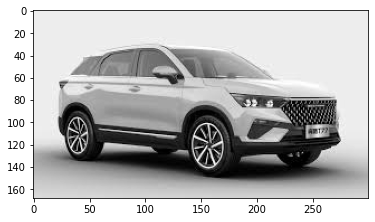

In [127]:
img = read_image(img_path,grayscale=True)
input_img = reshaping_in(img,grayscale=True)
print(input_img.shape[1:])
model = get_conv_model(filters=1, 
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Pooling 

In [128]:
def max_pooling(img, pool_size=(2,2),strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,
                                            strides=strides)
  
  result = pooling_layer(reshaped_img)
  return result

(168, 300)

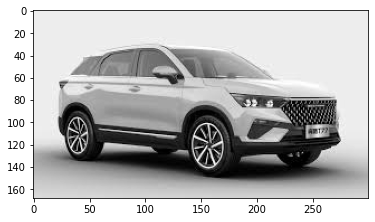

In [129]:
img = read_image(img_path)
img.shape

In [132]:
result = max_pooling(img)

print(result.shape )

(1, 84, 150, 1)


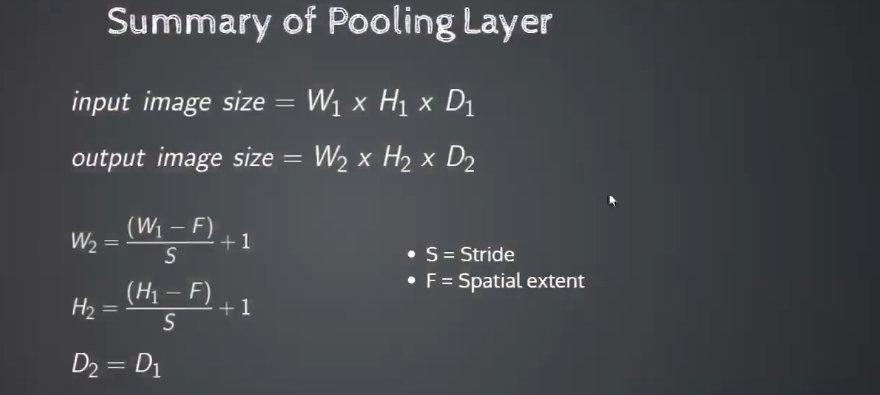

In [133]:
(168 - 2)//2 + 1

84

In [134]:
(300 - 2)//2 + 1

150

In [135]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img,  cmap = "gray")
  

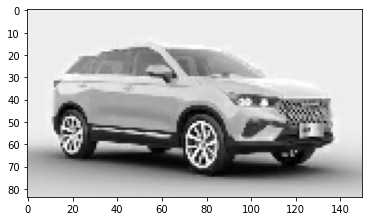

In [137]:
plot_pooling(result)

In [138]:
_, row, col, _ = result.shape
reshape = tf.reshape(result, (row, col))

In [139]:
result = max_pooling(reshape.numpy())
result.shape

TensorShape([1, 42, 75, 1])

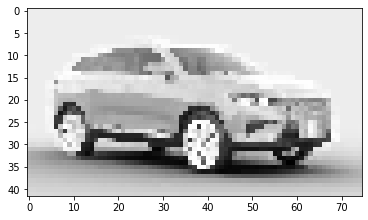

In [140]:
plot_pooling(result)